<a href="https://www.kaggle.com/code/prasadposture121/stellar-classification?scriptVersionId=110630881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stellar Classfication

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('../input/stellar-classification-dataset-sdss17/star_classification.csv')
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [5]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [6]:
df.describe(include=['O'])

class
count   100000
unique       3
top     GALAXY
freq     59445

In [11]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

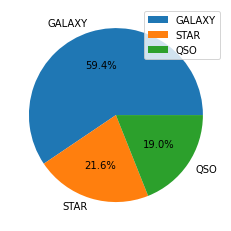

In [13]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

In [7]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

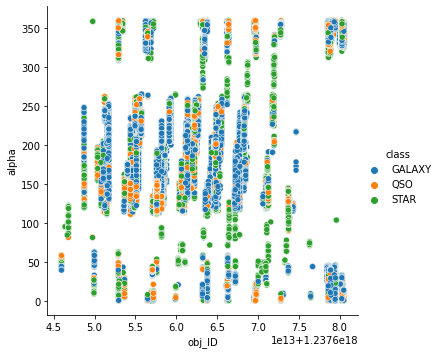

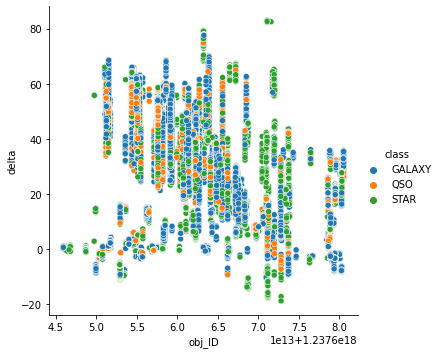

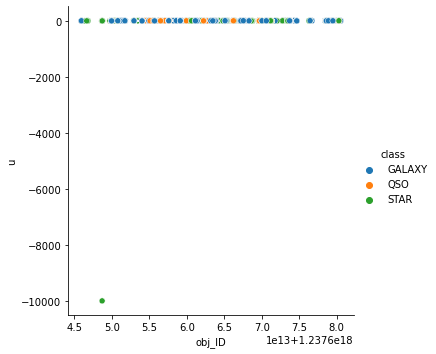

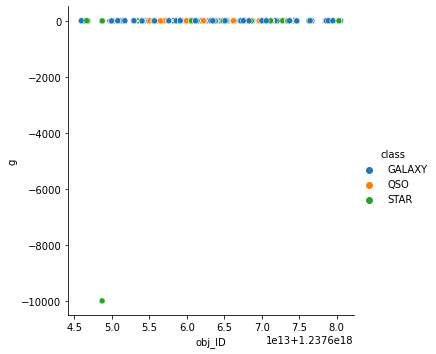

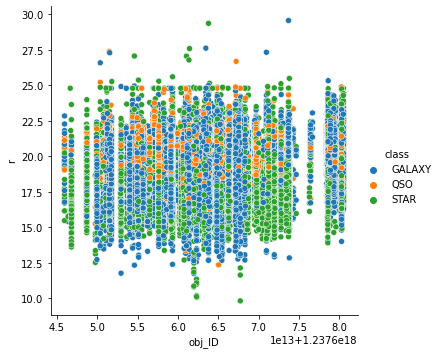

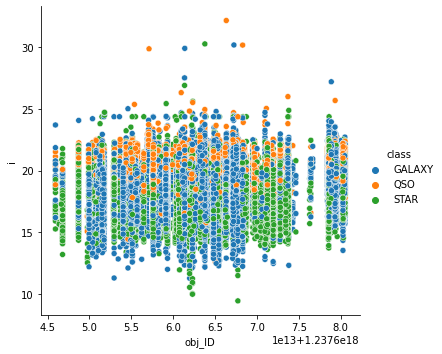

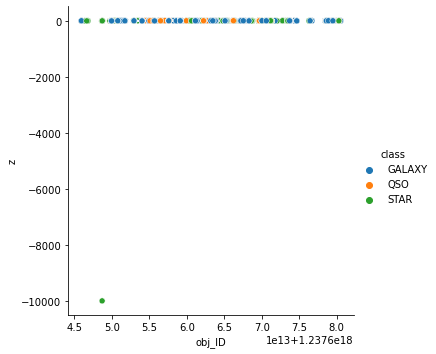

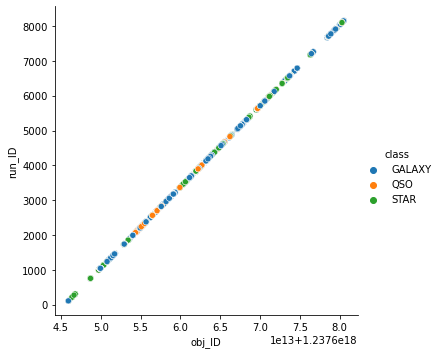

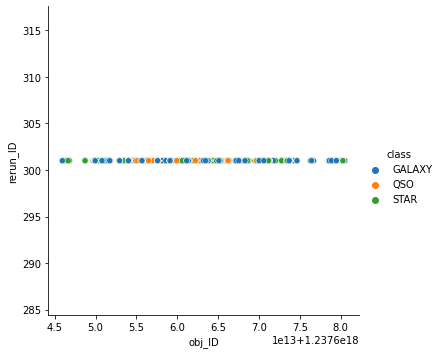

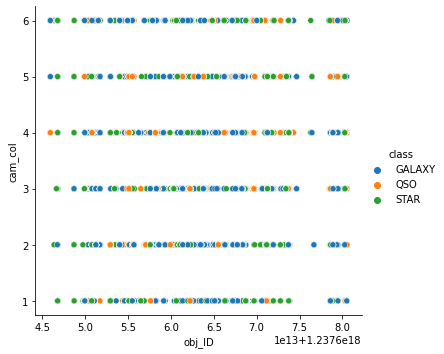

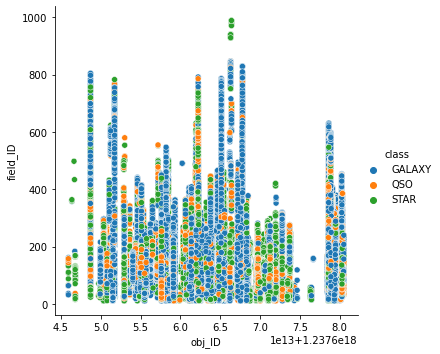

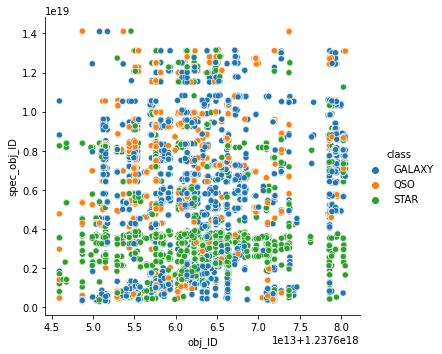

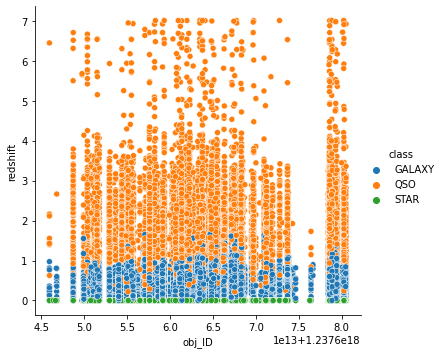

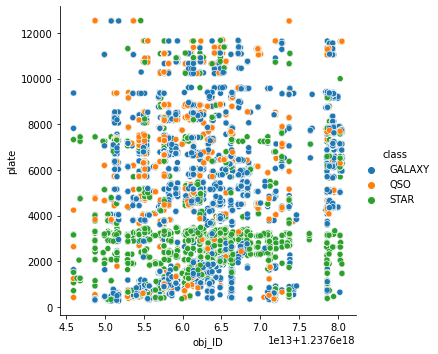

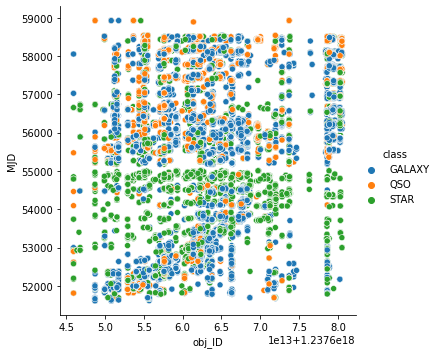

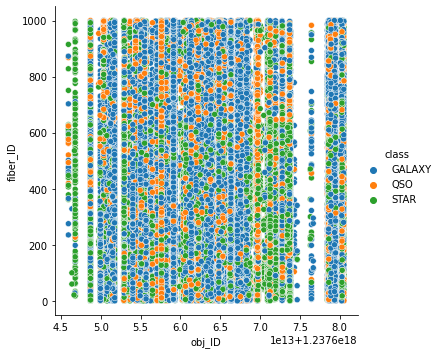

In [8]:
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

Here it seems that the redshift plays an important part in the stellar classification since we can clearly distinguish between the various clusters of points. Attributes which are showing y=mx+c relationship with `obj_ID` are insiginificant and need to removed. Which include run_ID and rerun_ID. It may seem that the relation of `u`, `g` and `z` is also of the simliar sorts but if you observed closely there is an outlier, which causes all the other data points to appear close.

In [9]:
print('Shape before filtering :',df.shape)
df=df[df.z>-2000]
df=df[df.u>-2000]
df=df[df.g>-2000]
print('Shape after filtering :',df.shape)
#There was only one value going off the limits 

Shape before filtering : (100000, 18)

Shape after filtering : (99999, 18)


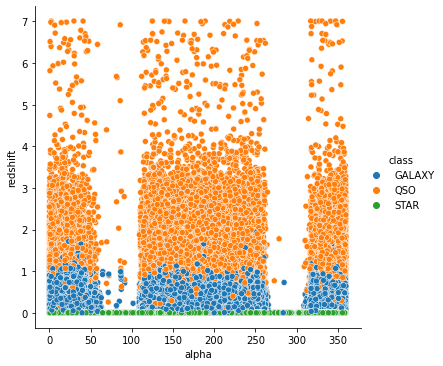

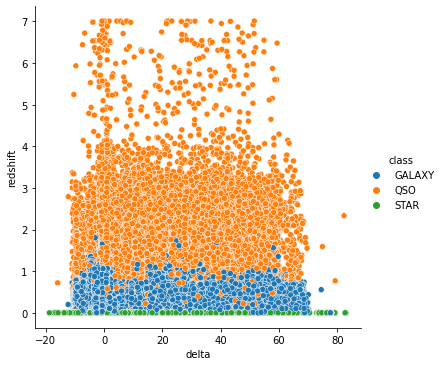

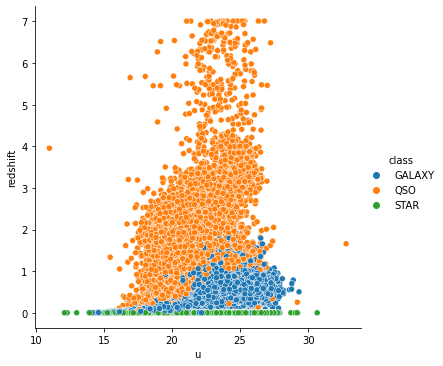

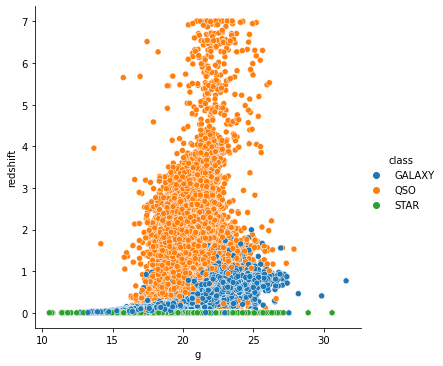

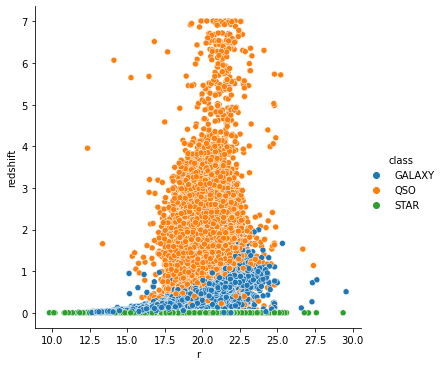

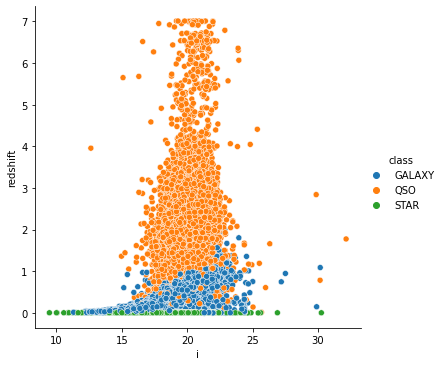

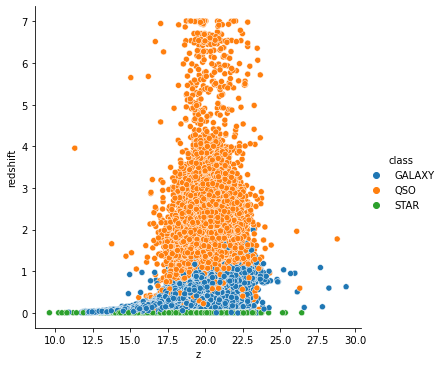

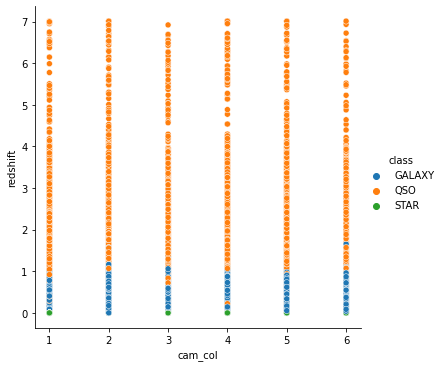

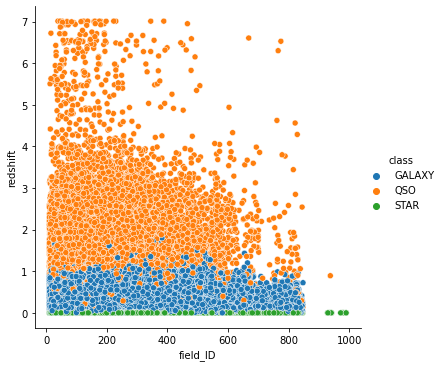

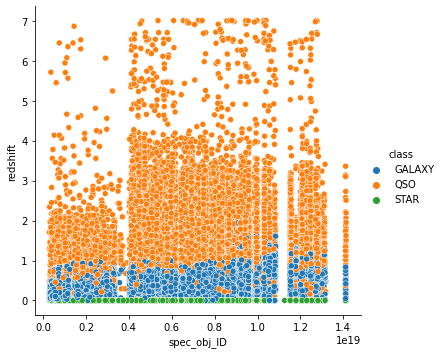

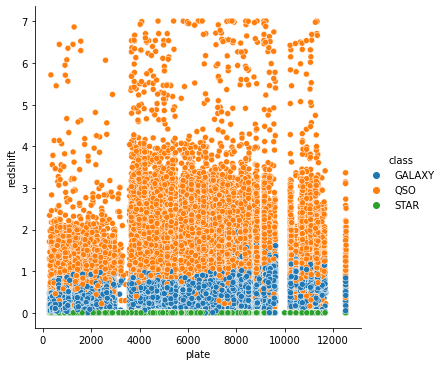

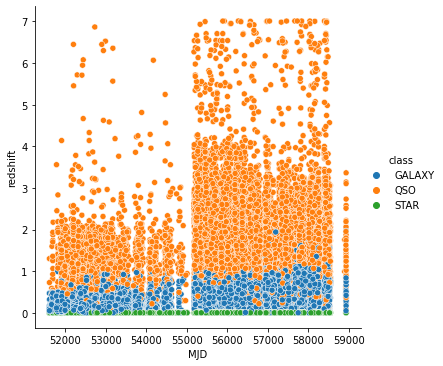

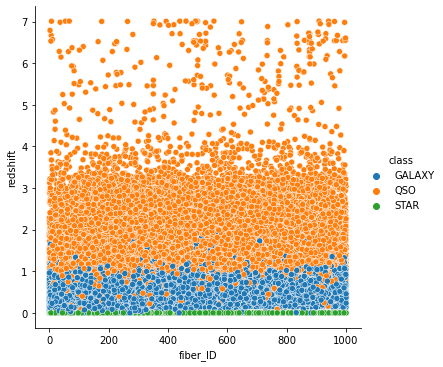

In [10]:
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 
          'cam_col', 'field_ID', 'spec_obj_ID',
          'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x=i, y='redshift', hue='class')
    plots.append(g);

In [11]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=3)

In [32]:
y_predicted=km.fit_predict(df[['redshift','alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 
          'cam_col', 'field_ID', 'spec_obj_ID',
          'plate', 'MJD', 'fiber_ID']])
y_predicted

array([1, 2, 1, ..., 0, 2, 2])

In [34]:
df['cluster']=y_predicted
df.head()

obj_ID     alpha     delta         u         g         r         i  \
0  1.237661e+18  0.376905  0.503802  0.591347  0.558050  0.535344  0.427665   
1  1.237665e+18  0.402286  0.491812  0.632603  0.584423  0.646203  0.515986   
2  1.237661e+18  0.394960  0.534139  0.654888  0.576463  0.546218  0.435729   
3  1.237663e+18  0.940947  0.180600  0.511384  0.629186  0.596946  0.486717   
4  1.237680e+18  0.959118  0.392679  0.387463  0.335579  0.337999  0.287021   

          z  run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID   class  \
0  0.464377    3606       301      0.2  0.069530     0.451585  GALAXY   
1  0.607035    4518       301      0.8  0.110429     0.828833  GALAXY   
2  0.472194    3606       301      0.2  0.111452     0.350946  GALAXY   
3  0.487460    4192       301      0.4  0.207566     0.723313  GALAXY   
4  0.300043    8102       301      0.4  0.128834     0.476759  GALAXY   

   redshift     plate       MJD  fiber_ID  cluster  
0  0.091831  0.451592  0.648007  0.170170        1  
1  0.112389  0.828841  0.894320  0.426426        2  
2  0.093170  0.350949  0.543965  0.298298        1  
3  0.134210  0.723312  0.878072  0.774775        1  
4  0.017959  0.476753  0.625205  0.841842        1

<AxesSubplot:xlabel='delta', ylabel='redshift'>

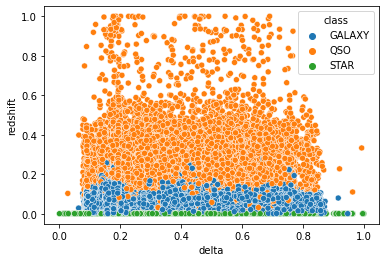

In [23]:
sns.scatterplot(data=df,x='delta', y='redshift', hue='class')

<AxesSubplot:xlabel='delta', ylabel='redshift'>

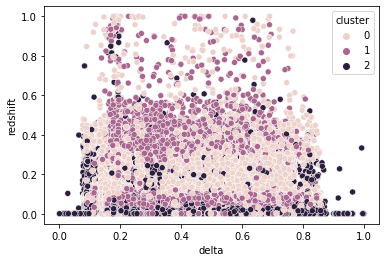

In [24]:
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 
          'cam_col', 'field_ID', 'spec_obj_ID',
          'plate', 'MJD', 'fiber_ID']:
    df[i]=scaler.fit_transform(df[[i]])

In [27]:
#df['delta']=scaler.fit_transform(df[['delta']])
#df['redshift']=scaler.fit_transform(df[['redshift']])

In [28]:
y_predicted=km.fit_predict(df[['delta','redshift']])
y_predicted

array([2, 2, 2, ..., 2, 0, 0])

In [29]:
df['cluster']=y_predicted
df.head()

obj_ID     alpha     delta         u         g         r         i  \
0  1.237661e+18  0.376905  0.503802  0.591347  0.558050  0.535344  0.427665   
1  1.237665e+18  0.402286  0.491812  0.632603  0.584423  0.646203  0.515986   
2  1.237661e+18  0.394960  0.534139  0.654888  0.576463  0.546218  0.435729   
3  1.237663e+18  0.940947  0.180600  0.511384  0.629186  0.596946  0.486717   
4  1.237680e+18  0.959118  0.392679  0.387463  0.335579  0.337999  0.287021   

          z  run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID   class  \
0  0.464377    3606       301      0.2  0.069530     0.451585  GALAXY   
1  0.607035    4518       301      0.8  0.110429     0.828833  GALAXY   
2  0.472194    3606       301      0.2  0.111452     0.350946  GALAXY   
3  0.487460    4192       301      0.4  0.207566     0.723313  GALAXY   
4  0.300043    8102       301      0.4  0.128834     0.476759  GALAXY   

   redshift     plate       MJD  fiber_ID  cluster  
0  0.091831  0.451592  0.648007  0.170170        2  
1  0.112389  0.828841  0.894320  0.426426        2  
2  0.093170  0.350949  0.543965  0.298298        2  
3  0.134210  0.723312  0.878072  0.774775        1  
4  0.017959  0.476753  0.625205  0.841842        2

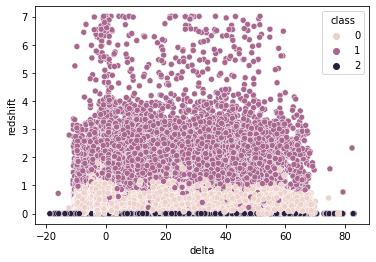

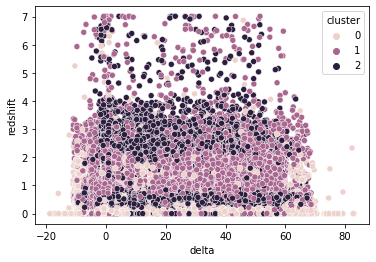

In [58]:
sns.scatterplot(data=df,x='delta', y='redshift', hue='class')
plt.show()
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster')
plt.show()

# Unsupervised Approch

In [5]:
import pandas as pd
df=pd.read_csv('star_classification.csv')
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for i in ['redshift', 'u', 'g', 'r', 'i', 'z']:
    df[i]=scaler.fit_transform(df[[i]])

In [7]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['redshift', 'u', 'g', 'r', 'i', 'z']])
df['cluster']=y_predicted
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  0.999113  0.999070  0.535344   
1  1.237665e+18  144.826101  31.274185  0.999202  0.999126  0.646203   
2  1.237661e+18  142.188790  35.582444  0.999251  0.999109  0.546218   
3  1.237663e+18  338.741038  -0.402828  0.998939  0.999220  0.596946   
4  1.237680e+18  345.282593  21.183866  0.998670  0.998602  0.337999   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  0.427665  0.998944    3606       301        2        79  6.543777e+18   
1  0.515986  0.999225    4518       301        5       119  1.176014e+19   
2  0.435729  0.998959    3606       301        2       120  5.152200e+18   
3  0.486717  0.998990    4192       301        3       214  1.030107e+19   
4  0.287021  0.998620    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  cluster  
0  GALAXY  0.091831   5812  56354       171        0  
1  GALAXY  0.112389  10445  58158       427        0  
2  GALAXY  0.093170   4576  55592       299        0  
3  GALAXY  0.134210   9149  58039       775        0  
4  GALAXY  0.017959   6121  56187       842        2

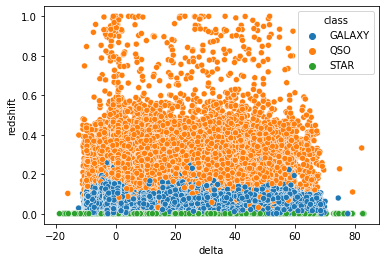

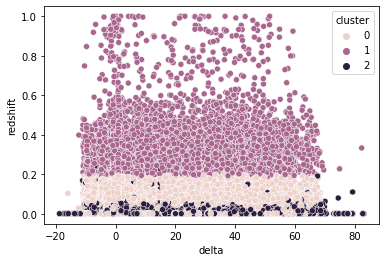

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x='delta', y='redshift', hue='class')
plt.show()
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster')
plt.show()

In [9]:
df.cluster.unique()

array([0, 2, 1])

In [10]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [11]:
df['class'].replace({'GALAXY':0,'QSO':1,'STAR':2},inplace=True)
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  0.999113  0.999070  0.535344   
1  1.237665e+18  144.826101  31.274185  0.999202  0.999126  0.646203   
2  1.237661e+18  142.188790  35.582444  0.999251  0.999109  0.546218   
3  1.237663e+18  338.741038  -0.402828  0.998939  0.999220  0.596946   
4  1.237680e+18  345.282593  21.183866  0.998670  0.998602  0.337999   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  0.427665  0.998944    3606       301        2        79  6.543777e+18   
1  0.515986  0.999225    4518       301        5       119  1.176014e+19   
2  0.435729  0.998959    3606       301        2       120  5.152200e+18   
3  0.486717  0.998990    4192       301        3       214  1.030107e+19   
4  0.287021  0.998620    8102       301        3       137  6.891865e+18   

   class  redshift  plate    MJD  fiber_ID  cluster  
0      0  0.091831   5812  56354       171        0  
1      0  0.112389  10445  58158       427        0  
2      0  0.093170   4576  55592       299        0  
3      0  0.134210   9149  58039       775        0  
4      0  0.017959   6121  56187       842        2

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
print(accuracy_score(df['class'], df['cluster']))

0.60892


In [33]:
df['class'].unique()

array([0, 1, 2], dtype=int64)